<a href="https://colab.research.google.com/github/ririnoia/-/blob/master/sound_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**おまじない?**

In [0]:
!pip install pyreaper

In [0]:
import os
import wave
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import scipy.signal as sg
from scipy.io import wavfile
from IPython.display import Audio
import pyreaper

import librosa
import librosa.display
import librosa.feature
import librosa.effects
import librosa.onset
import librosa.beat

#sound_file = "a.wav"


**波形**

In [0]:
"""
wf = wave.open(sound_file, "rb")
ch = wf.getnchannels() #チャンネル数
ssize = wf.getsampwidth() #サンプルの大きさ
srate = wf.getframerate() #サンプリングレート
data = wf.readframes(flame)#データ
Adata = np.frombuffer(data, dtype="int16" % (8 * ssize)) #データの表　
"""
def info(sound_file):
  wf = wave.open(sound_file, "rb")
  flame = wf.getnframes()
  wf.close()

  srate, data = wavfile.read(sound_file)
  #data,srate = librosa.load(sound_file)

  pm_times, pm, f0_times, f0, corr = pyreaper.reaper(data, srate)
  print(flame)
  print(f0[15])

  plt.subplot(211)
  plt.plot(pm_times,pm,label="PitchMark")
  plt.legend()

  plt.subplot(212)
  plt.plot(f0_times,f0,label="f0")
  plt.legend()

  plt.show()
  data = np.frombuffer(data, dtype="int16") /32768 #正規化
  return(srate,data,pm_times, pm, f0_times, f0, corr)

**基本周波数**

In [0]:
def fre(pm_times, pm, f0_times, f0):
  n = 0
  i = 0
  flag = 0
  sum_f0 = 0

  """
  print(len(f0))
  print(len(pm_times))
  print(len(f0_times))
  """
  while n<len(pm):
    if pm[n]==1:
      pm_start = n
      break
    n = n+1
  #print(pm_start)
  start=pm_times[pm_start]
  #print(start)

  n=0

  while n<len(f0_times):
    if f0_times[n]>=start:
      start=n
      break
    n = n+1

  #print(n)

  while n<len(f0):
    sum_f0 = sum_f0+f0[n]
    n = n+1
    i = i+1
  ave_f0 = sum_f0/i
  Inter = librosa.hz_to_note(ave_f0)

  #print(ave_f0)
  #print(Inter)
  return(ave_f0,Inter)

In [0]:
def fre(f0):
  n = 0
  i = 0
  sum_f0 = 0

  m_f0 = np.max(f0)
  while n < len(f0):
    if f0[n] > m_f0-40:
      sum_f0 = sum_f0+f0[n]
      i = i+1
    n = n+1
  ave_f0 = sum_f0/i
  return (ave_f0)

**フーリエ変換**

In [0]:
"""
def FFT(data)
  FFT = np.fft.fft(data)
  fList = np.fft.fftfreq(N, d=1.0/flame) 

  AS = [np.sqrt(c.real ** 2 + c.imag ** 2) for c in FFT]  # 振幅スペクトル

  max_value = max(AS)
  max_index = AS.index(max_value)
  return(fList[max_value])
"""

**実行部分**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


14109
469.14893


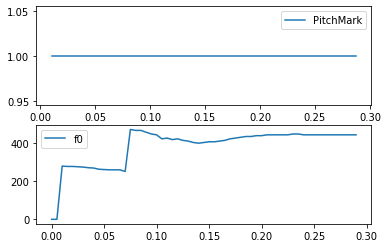

443.6980732509068


In [0]:
path = 'SoundSample/'
files = []

for x in os.listdir(path):
    if os.path.isfile(path + x):
        files.append(x) 

#print(files)

for name in files:
  srate,data,pm_times, pm, f0_times, f0, corr = info("SoundSample/"+name)
  sound_f0 = fre(f0)
  print(sound_f0)